# GA
世代数 (Generations): generations = 100  
個体群のサイズ (Population Size): population_size = 50  
交叉率 (Crossover Rate): 特定の交叉率は設定されていませんが、crossover関数内で50%の確率で親1または親2のルートが選択されています。  
突然変異率 (Mutation Rate): if random.random() < 0.1: というコードから、突然変異率が10%であることがわかります。  
トーナメントサイズ (Tournament Size): tournament_size = 3  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import random
import math
import datetime

# 現在の日付と時刻を取得
now = datetime.datetime.now()

# yyyymmddhhmmss形式で表示
formatted_datetime = now.strftime("%Y%m%d%H%M%S")

print(formatted_datetime)

20230914211326


In [2]:
dfschool = pd.read_csv('evaluation/fukurois_v3.csv',index_col = 0)
# The desired order
desired_order = [28, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]#対象　いちばん初めはデマンド
dfschool = dfschool.reindex(desired_order)
dfschool = dfschool.reset_index(drop=True)##学校数設定しておく
dfschool

,学校名,住所,センター,longitude,latitude,dish,class,dish_container,demand,elevation,start_time,end_time,start,end
0,中部センター,豊沢２２８９−２,中部センター,34.737693,137.964272,0,0,0,0,71.022873,0,720,0.0,12.0
1,袋井東小学校,広岡2317番地の１,中部センター,34.758102,137.945052,318,13,2,2,15.248384,660,690,11.0,11.5
2,袋井西小学校,袋井市川井442番地,中部センター,34.746236,137.916140,543,20,3,3,12.070471,660,690,11.0,11.5
3,袋井南小学校,高尾740番地,中部センター,34.742079,137.931908,641,22,3,3,25.327871,660,690,11.0,11.5
4,袋井北小学校,久能1580番地,中部センター,34.759207,137.914826,"1,079",34,6,6,14.273340,660,690,11.0,11.5
5,高南小学校,上田町306番地の２,中部センター,34.734721,137.934382,441,15,3,3,12.849963,660,690,11.0,11.5
6,浅羽東小学校,浅羽2800番地,中部センター,34.721179,137.927260,387,13,3,2,17.661812,660,690,11.0,11.5
7,袋井中学校,川井701番地,中部センター,34.745832,137.918893,860,30,4,4,11.627437,660,700,11.5,11.7
8,袋井南中学校,愛野3110番地,中部センター,34.742036,137.942423,522,16,3,3,30.801228,660,700,11.5,11.7
9,袋井東幼稚園,国本2288番地,中部センター,34.760808,137.937936,69,3,0,1,14.773001,630,660,10.5,11.0


In [3]:
dfvehicle = pd.read_csv('evaluation/中部給食センター_車両.csv', index_col = 0)
dfvehicle 

,name,container,t,memo
1,1いすずエルフ,6,３ｔ,パワーゲート付
2,2いすずエルフ,6,３ｔ,パワーゲート付
3,3いすずエルフ,6,３ｔ,パワーゲート付
4,4いすずエルフ,6,３ｔ,パワーゲート付
5,5いすずエルフ,4,２ｔ,NaN
6,6いすずエルフ,4,２ｔ,NaN
7,7いすずエルフ,4,２ｔ,NaN
8,8トヨタ,6,３ｔ,NaN
9,9日野デュトロ,6,２ｔ,NaN


In [4]:
#距離
df_distance = pd.read_csv('csv/distance_matrix.csv', header=None)
# Reorder the matrix
distance = df_distance.iloc[desired_order, desired_order].values.tolist()
distance

[[0.0,
  4.188,
  5.846,
  3.952,
  6.655,
  3.566,
  4.975,
  5.677,
  3.359,
  5.669,
  5.713,
  6.382,
  4.794,
  6.993,
  8.114,
  5.636,
  5.111,
  7.795,
  5.634,
  5.598],
 [4.188,
  0.0,
  3.178,
  3.695,
  3.211,
  3.738,
  5.622,
  3.263,
  2.429,
  1.254,
  3.456,
  7.731,
  5.441,
  8.448,
  10.151,
  7.473,
  9.009,
  10.049,
  7.472,
  7.519],
 [5.553,
  3.178,
  0.0,
  2.023,
  2.18,
  2.856,
  4.589,
  0.477,
  3.29,
  2.92,
  0.133,
  2.609,
  4.676,
  5.37,
  9.325,
  5.265,
  8.626,
  9.223,
  5.09,
  5.646],
 [3.952,
  3.694,
  2.022,
  0.0,
  3.124,
  1.782,
  3.78,
  1.853,
  1.688,
  3.298,
  1.889,
  3.429,
  3.599,
  6.064,
  8.309,
  5.338,
  7.167,
  8.207,
  5.163,
  5.677],
 [7.667,
  3.485,
  2.181,
  3.136,
  0.0,
  4.703,
  6.436,
  2.263,
  4.303,
  2.533,
  2.456,
  5.125,
  6.523,
  7.575,
  10.125,
  7.008,
  10.883,
  10.023,
  6.833,
  7.493],
 [3.566,
  3.738,
  2.856,
  1.782,
  4.486,
  0.0,
  2.784,
  2.687,
  1.304,
  3.614,
  2.723,
  3.742,


In [5]:
#移動時間
df_duration = pd.read_csv('csv/duration_matrix.csv', header=None)
# Reorder the matrix
duration = df_duration.iloc[desired_order, desired_order].values.tolist()
duration

[[0.0,
  7.6,
  11.6,
  7.316666666666666,
  15.066666666666666,
  6.483333333333333,
  8.016666666666667,
  11.1,
  5.316666666666666,
  11.3,
  11.05,
  11.366666666666667,
  7.233333333333333,
  10.833333333333334,
  12.283333333333331,
  8.733333333333333,
  9.0,
  11.616666666666667,
  8.15,
  8.366666666666667],
 [7.766666666666667,
  0.0,
  7.15,
  8.283333333333333,
  6.366666666666666,
  7.55,
  10.8,
  7.2,
  4.35,
  3.85,
  7.383333333333334,
  9.95,
  10.016666666666667,
  15.666666666666666,
  18.25,
  14.333333333333334,
  15.933333333333334,
  17.85,
  13.75,
  13.85],
 [11.566666666666666,
  7.366666666666666,
  0.0,
  6.75,
  7.333333333333333,
  8.133333333333333,
  10.033333333333331,
  1.9166666666666667,
  8.5,
  7.7,
  0.5,
  5.333333333333333,
  9.85,
  9.95,
  15.783333333333331,
  10.35,
  17.733333333333334,
  15.4,
  9.633333333333333,
  12.033333333333331],
 [7.333333333333333,
  8.616666666666667,
  6.85,
  0.0,
  10.25,
  5.3,
  8.7,
  6.35,
  4.2833333333

In [6]:
# サービス時間
service_time = 5  # 分

In [7]:
# Customer count ('0' is depot) 
customer_count = len(dfschool)
# The number of vehicle
vehicle_count = len(dfvehicle)
# The capacity of vehicle
vehicle_capacity = list(dfvehicle['container'])

In [8]:
# Extracting start_time and end_time data from dfschool dataframe
start_times = dfschool["start_time"].tolist()
end_times = dfschool["end_time"].tolist()
# Extracting demand data and vehicle capacities
demands = dfschool["demand"].tolist()
vehicle_capacities = dfvehicle["container"].tolist()

In [9]:
def plot_routes(routes, latitudes, longitudes, school_names):
    """
    Plot the routes on a 2D plane using latitude and longitude.
    """
    plt.figure(figsize=(12, 8))
    
    # Plot all points
    plt.scatter(longitudes, latitudes, s=100, c='red', marker='o')
    
    # Annotate points
    for i, name in enumerate(school_names):
        plt.annotate(name, (longitudes[i], latitudes[i]), fontsize=10, ha='right')
    
    # Plot routes
    for route in routes:
        for i in range(len(route)-1):
            plt.plot([longitudes[route[i]], longitudes[route[i+1]]], 
                     [latitudes[route[i]], latitudes[route[i+1]]], c='blue')
    
    plt.title("Visualization of Routes")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

In [10]:
# Genetic Algorithm Functions from the modified code cells

def initialize_population(size, customers, num_vehicles):
    population = []
    for _ in range(size):
        shuffled_customers = random.sample(customers, len(customers))
        avg = len(shuffled_customers) // num_vehicles
        solution = [shuffled_customers[i * avg: (i + 1) * avg] for i in range(num_vehicles)]
        population.append(solution)
    return population

def evaluate_solution(solution, demands, vehicle_capacities):
    distances = []
    penalties = 0
    for route_index, route in enumerate(solution):
        route_distance = 0
        prev = 0  # depot (id0)
        current_time = 0  # Starting from 0
        current_load = 0  # Starting load for each vehicle
        
        for customer in route:
            route_distance += distance[prev][customer]
            current_time += duration[prev][customer]
            
            # Add the demand of the customer to the current load
            current_load += demands[customer]
            
            # Check for capacity constraint violation
            if current_load > vehicle_capacities[route_index]:
                penalties += (current_load - vehicle_capacities[route_index]) * 1000  # Arbitrary penalty value
            
            # Check if the current_time is before the start_time or after the end_time for the customer
            if current_time < start_times[customer]:
                current_time = start_times[customer]
            elif current_time > end_times[customer]:
                penalties += (current_time - end_times[customer]) * 1000
                
            current_time += service_time
            prev = customer
        
        route_distance += distance[customer][0]
        distances.append(route_distance)
    
    total_distance = sum(distances)
    return total_distance + penalties


# Continuing the GA functions from the modified code cells

def crossover(parent1, parent2):
    child = []
    used_customers = set()
    for i in range(len(parent1)):
        if random.random() < 0.5:
            route = parent1[i][:]
        else:
            route = parent2[i][:]
        for cust in route:
            if cust in used_customers:
                route.remove(cust)
        used_customers.update(route)
        child.append(route)
    missing_customers = set(range(1, len(duration))) - used_customers
    for cust in missing_customers:
        random.choice(child).append(cust)
    return child

def mutate(solution):
    route1, route2 = random.sample(solution, 2)
    if route1 and route2:
        cust1 = random.choice(route1)
        route1.remove(cust1)
        route2.append(cust1)

def select_parents_with_time_window(population):
    tournament_size = 5
    parents = []
    for _ in range(2):
        candidates = random.sample(population, tournament_size)
        candidates.sort(key=lambda s: evaluate_solution(s, demands, vehicle_capacities))
        parents.append(candidates[0])
    return parents

def elitism(current_generation, next_generation, elite_count):
    current_generation.sort(key=lambda s: evaluate_solution(s, demands, vehicle_capacities))
    elites = current_generation[:elite_count]
    next_generation[-elite_count:] = elites

def genetic_algorithm(population_size, generations, num_vehicles, demands, vehicle_capacities, elite_count):
    customers = list(range(1, len(duration)))
    population = initialize_population(population_size, customers, num_vehicles)
    
    # To store the best fitness value in each generation
    best_fitness_history = []
    
    for _ in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = select_parents_with_time_window(population)
            child = crossover(parent1, parent2)
            if random.random() < 0.1:
                mutate(child)
            new_population.append(child)
        population = new_population
        
        
        # Add elitism to preserve the best individuals
        elitism(population, new_population, elite_count)

        # Evaluate and store the best fitness in this generation
        best_fitness = min([evaluate_solution(ind, demands, vehicle_capacities) for ind in population])
        best_fitness_history.append(best_fitness)
                                    
    population.sort(key=lambda s: evaluate_solution(s, demands, vehicle_capacities))
    return population[0], best_fitness_history


In [11]:

# Execute the genetic algorithm
num_vehicles = vehicle_count
#num_vehicles = 
population_size = 50
generations = 100
customers = list(range(1, len(duration)))
population = initialize_population(population_size, customers, num_vehicles)
# Define elite_count based on your requirements
elite_count = 2  # 例: エリート個体の数を2としますが、必要に応じて調整してください

# Run the genetic algorithm
best_solution, best_fitness_history = genetic_algorithm(population_size, generations, num_vehicles, demands, vehicle_capacities, elite_count)
best_solution

[[14, 8, 1],
 [10, 6, 17],
 [2, 3, 18],
 [11, 7],
 [15, 19],
 [9, 12, 13],
 [],
 [5],
 [4, 16]]

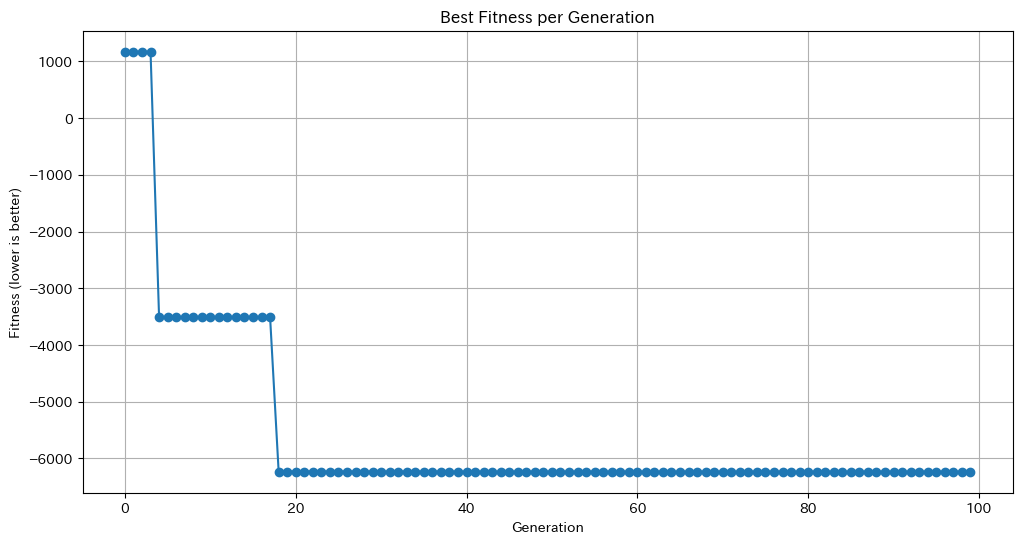

In [12]:
# Plotting the best fitness history
plt.figure(figsize=(12, 6))
plt.plot(best_fitness_history, '-o')
plt.title("Best Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Fitness (lower is better)")
plt.grid(True)
plt.savefig('evaluation_resultGA/{}_v3.png'.format(formatted_datetime))
plt.show()


[[0, 14, 8, 1, 0], [0, 10, 6, 17, 0], [0, 2, 3, 18, 0], [0, 11, 7, 0], [0, 15, 19, 0], [0, 9, 12, 13, 0], [0, 0], [0, 5, 0], [0, 4, 16, 0]]


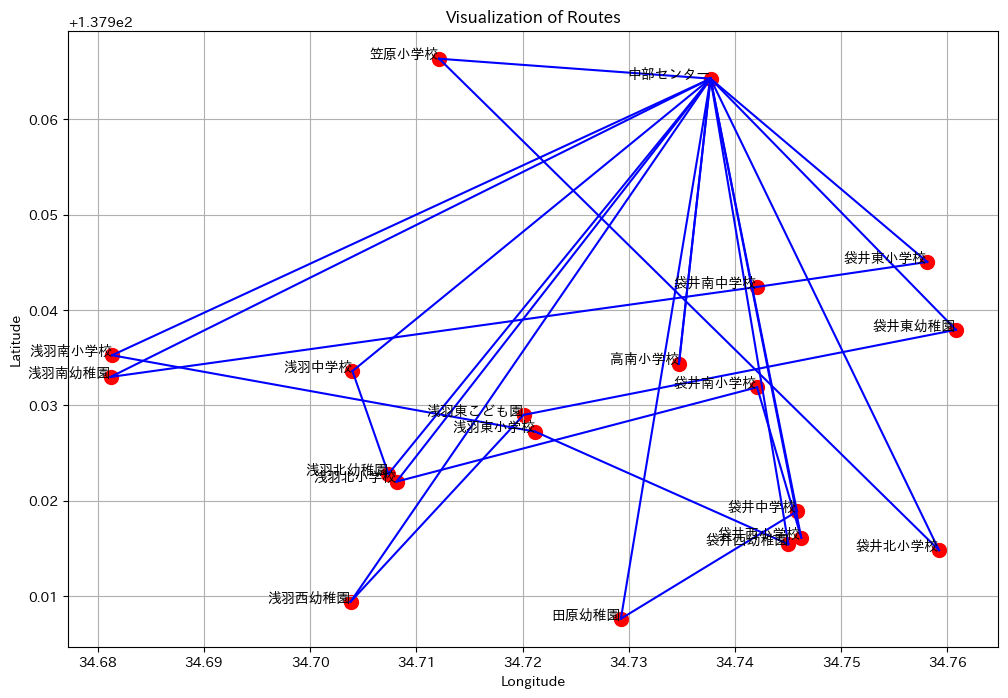

In [13]:
# Extracting latitudes, longitudes, and school names from the dataframe
latitudes = dfschool["latitude"].tolist()
longitudes = dfschool["longitude"].tolist()
school_names = dfschool["学校名"].tolist()

# Adding depot to the start and end of each route for visualization
for route in best_solution:
    route.insert(0, 0)
    route.append(0)
print(best_solution)
# Plotting the routes
plot_routes(best_solution, latitudes, longitudes, school_names)

# テキストファイルに書き込み
with open('evaluation_resultGA/result.csv', "a") as file:
    file.write(formatted_datetime+'_v3'+' ')
    for row in best_solution:
        file.write(str(row))
    file.write('\n')

In [14]:
def calculate_route_info(routes, distance):
    """
    Calculate route information such as number of vehicles used, total distance, and distance per vehicle.
    """
    # Number of vehicles used
    num_vehicles = len(routes)
    
    # Vehicles used
    vehicles_used = [i+1 for i in range(num_vehicles)]
    
    # Total number of customers visited
    total_customers_visited = sum([len(route)-2 for route in routes])  # Subtracting 2 for depot at start and end
    
    # Total distance traveled by all vehicles
    total_distance = sum([sum([distance[route[i]][route[i+1]] for i in range(len(route)-1)]) for route in routes])
    
    # Distance traveled by each vehicle
    distance_per_vehicle = [sum([distance[route[i]][route[i+1]] for i in range(len(route)-1)]) for route in routes]
    
    return num_vehicles, vehicles_used, total_customers_visited, total_distance, distance_per_vehicle

# Calculating route information
num_vehicles, vehicles_used, total_customers_visited, total_distance, distance_per_vehicle = calculate_route_info(best_solution, distance)
num_vehicles, vehicles_used, total_customers_visited, total_distance, distance_per_vehicle


(9,
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 19,
 142.47,
 [22.448999999999998,
  23.498,
  18.666,
  14.36,
  12.551,
  21.165,
  0.0,
  7.132,
  22.649])